In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time(data, methods,ylabel='Time Cost (seconds)'):
    """
    绘制不同方法在多个数据集上的时间成本对比柱状图
    
    参数:
        data: 字典，键为数据集名称，值为对应数据集上各方法的指标值列表（长度与 methods 一致）
        methods: 列表，方法名称，需与data中每个值的顺序对应
        ylabel: 字符串，y轴标签文本

    配色： palette = ['#4C72B0', '#DD8452', '#55A868']
    """
    # 图表设置
    plt.figure(figsize=(12, 6), dpi=120)
    plt.rcParams.update({
        'mathtext.fontset': 'stix',
        'axes.edgecolor': '0.4',
        'xtick.major.size': 5
    })

    palette = ['#4C72B0', '#DD8452', '#55A868']

    bar_width = 0.28
    x = np.arange(len(data))

    # 数据排序处理
    sorted_data = {}
    for ds in data:
        # 将方法、数值和颜色组合后按数值排序
        combined = sorted(zip(methods, data[ds], palette), key=lambda x: x[1])
        sorted_data[ds] = combined

    # 绘制柱状图
    hatches = ['///', '\\\\\\', '|||']  # 不同方法的填充图案
    for i, ds in enumerate(data):
        for j, (method, value, color) in enumerate(sorted_data[ds]):
            # 仅在第一个数据集时添加图例标签，避免重复
            plt.bar(i + j*bar_width, value, width=bar_width,
                   color=color, edgecolor='white', linewidth=0.7,
                   label=method if i==0 else "", hatch=hatches[j], alpha=0.9)

    # 坐标轴设置
    plt.xticks(x + bar_width, data.keys(), fontsize=20)
    plt.yticks(fontsize=18)
    plt.ylabel(ylabel, fontsize=20, labelpad=15)

    # 图例设置
    legend = plt.legend(frameon=True, framealpha=0.9,
                       edgecolor='0.8', fontsize=16,
                       title='Methods', title_fontsize=16,
                       loc='upper left')
    legend.get_frame().set_linewidth(0.5)
    
    # 网格线设置
    plt.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.4)

    # 美化边框
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # 调整布局
    plt.tight_layout()

    # 保存和显示图像
    plt.savefig('time_cost_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()

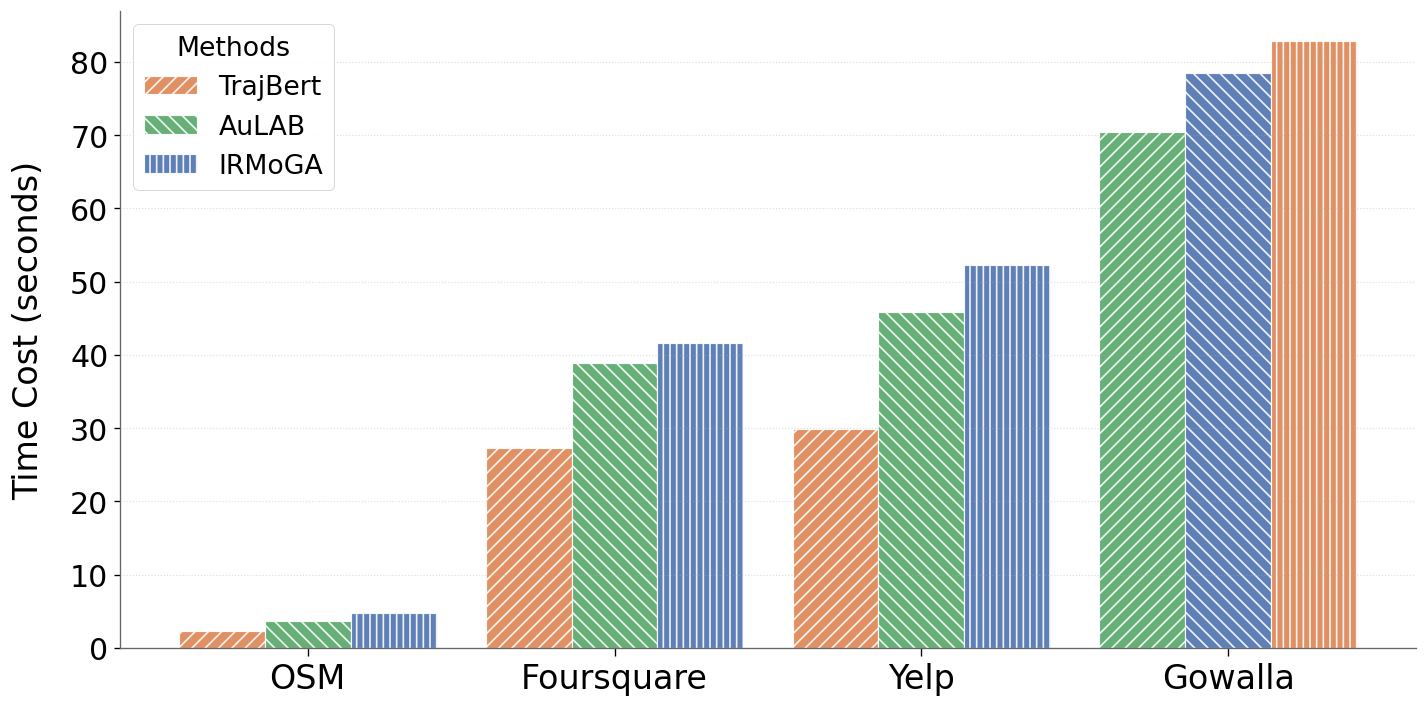

In [2]:
data = {
    'OSM': [4.7843, 2.236, 3.6434],
    'Foursquare': [41.5857, 27.3065, 38.8129],
    'Yelp': [52.2792, 29.8058, 45.8764],
    'Gowalla': [78.4447, 82.7887, 70.3896]
}
methods=['IRMoGA', 'TrajBert', 'AuLAB']
plot_time(data, methods)